In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Connecting to data
meter = pd.read_csv('Demand_1.2_meter.csv')
weather = pd.read_csv('demand_1.2_weather.csv')
meter.head()

,Meter ID,Channel,Date,Hour,Minute,Is DST,Volume
0,Demand_1.2,1,1/1/2018 0:00,0,0,0,8313.0
1,Demand_1.2,1,1/1/2018 0:00,1,0,0,7854.0
2,Demand_1.2,1,1/1/2018 0:00,2,0,0,7563.0
3,Demand_1.2,1,1/1/2018 0:00,3,0,0,7457.0
4,Demand_1.2,1,1/1/2018 0:00,4,0,0,7501.0


<H1>Data Preparation</H1>

In [7]:
#Weather data preparation
data_weather = weather.set_index(pd.DatetimeIndex(weather['date_time']))
data_weather = data_weather[['temperature', 'dewpoint', 'cloud_cover', 'humidity', 'wind_speed', 'wind_direction', 'precipitation']]
data_weather.head()

,temperature,dewpoint,cloud_cover,humidity,wind_speed,wind_direction,precipitation
date_time,,,,,,,
2018-01-01 00:00:00,-2.0,-12.0,0,62,11.5,290,0.0
2018-01-01 01:00:00,-2.0,-13.0,0,59,16.1,310,0.0
2018-01-01 02:00:00,-3.0,-14.0,0,59,10.4,310,0.0
2018-01-01 03:00:00,-4.0,-14.0,0,62,11.5,300,0.0
2018-01-01 04:00:00,-4.0,-15.0,0,59,13.8,310,0.0


In [8]:
#meter data preparation
data_meter = meter[['Date', 'Hour','Volume']]
data_meter['Date'] = pd.to_datetime(data_meter['Date'])
data_meter['Hour'] = pd.to_datetime(data_meter['Hour'], format='%H')
data_meter['Hour'] = data_meter['Hour'].dt.time
data_meter['date_time'] = pd.to_datetime(data_meter.Date.astype(str) + ' ' + data_meter.Hour.astype(str))
data_2 = data_meter[['date_time' ,'Volume']]
data_2 = data_2.set_index(pd.DatetimeIndex(data_2['date_time']), drop=True)
data_2 = data_2['Volume']
data_2.head()

C:\Users\BIKRAM~1\AppData\Local\Temp/ipykernel_13164/1750588931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_meter['Date'] = pd.to_datetime(data_meter['Date'])
C:\Users\BIKRAM~1\AppData\Local\Temp/ipykernel_13164/1750588931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_meter['Hour'] = pd.to_datetime(data_meter['Hour'], format='%H')
C:\Users\BIKRAM~1\AppData\Local\Temp/ipykernel_13164/1750588931.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

date_time
2018-01-01 00:00:00    8313.0
2018-01-01 01:00:00    7854.0
2018-01-01 02:00:00    7563.0
2018-01-01 03:00:00    7457.0
2018-01-01 04:00:00    7501.0
Name: Volume, dtype: float64

<H1>Data Upsampling</H1>

<H2>Weather Data Upsampling</H2>

<H3>To convert to minutes than convert to sencond. eg. 5min = 300s</H3>

<function matplotlib.pyplot.show(close=None, block=None)>

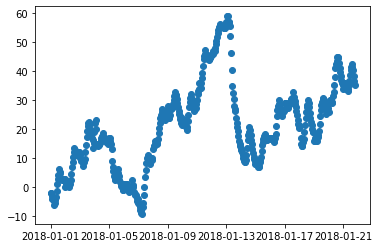

In [9]:
data_weather_2 = data_weather
plt.scatter(data_weather_2.index[0:500], data_weather_2['temperature'][0:500])
plt.show

In [10]:
data_weather_2 = data_weather_2.resample('300S').asfreq()
data_2_weather = data_weather_2.interpolate(method='linear')
data_2_weather.head()

,temperature,dewpoint,cloud_cover,humidity,wind_speed,wind_direction,precipitation
date_time,,,,,,,
2018-01-01 00:00:00,-2.0,-12.000000,0.0,62.00,11.500000,290.000000,0.0
2018-01-01 00:05:00,-2.0,-12.083333,0.0,61.75,11.883333,291.666667,0.0
2018-01-01 00:10:00,-2.0,-12.166667,0.0,61.50,12.266667,293.333333,0.0
2018-01-01 00:15:00,-2.0,-12.250000,0.0,61.25,12.650000,295.000000,0.0
2018-01-01 00:20:00,-2.0,-12.333333,0.0,61.00,13.033333,296.666667,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

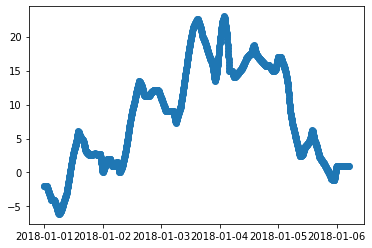

In [11]:
plt.scatter(data_2_weather.index[0:1500], data_2_weather['temperature'][0:1500])
plt.show

In [12]:
data_2_weather.tail()

,temperature,dewpoint,cloud_cover,humidity,wind_speed,wind_direction,precipitation
date_time,,,,,,,
2022-02-28 22:40:00,15.966667,2.033333,11.0,54.333333,5.366667,268.0,0.0
2022-02-28 22:45:00,15.925000,2.050000,11.0,54.500000,5.400000,267.0,0.0
2022-02-28 22:50:00,15.883333,2.066667,11.0,54.666667,5.433333,266.0,0.0
2022-02-28 22:55:00,15.841667,2.083333,11.0,54.833333,5.466667,265.0,0.0
2022-02-28 23:00:00,15.800000,2.100000,11.0,55.000000,5.500000,264.0,0.0


In [13]:
#data_2_weather.to_csv('Demand 1 5 Min Weather.csv')

In [14]:
data_2_weather.shape

(437749, 7)

<H2>Meter data Upsampling</H2>

                     Volume
date_time                  
2018-01-01 00:00:00  8313.0
2018-01-01 01:00:00  7854.0
2018-01-01 02:00:00  7563.0
2018-01-01 03:00:00  7457.0
2018-01-01 04:00:00  7501.0


<function matplotlib.pyplot.show(close=None, block=None)>

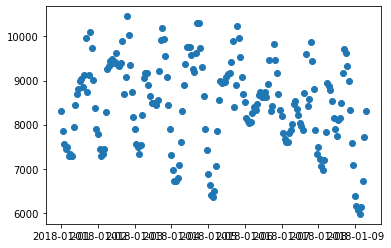

In [40]:
data_meter_2 = data_2.to_frame()
print(data_meter_2.head())
plt.scatter(data_meter_2.index[0:200], data_meter_2['Volume'][0:200])
plt.show

In [36]:
data_3 = data_2.resample('300S').asfreq()
data_3 = data_3.interpolate(method='linear')
data_3 = data_3.to_frame()
data_3.head(10)

,Volume
date_time,
2018-01-01 00:00:00,8313.00
2018-01-01 00:05:00,8274.75
2018-01-01 00:10:00,8236.50
2018-01-01 00:15:00,8198.25
2018-01-01 00:20:00,8160.00
2018-01-01 00:25:00,8121.75
2018-01-01 00:30:00,8083.50
2018-01-01 00:35:00,8045.25
2018-01-01 00:40:00,8007.00


In [37]:
data_3['Date'] = data_3.index.date
data_3['Hour'] = data_3.index.hour
data_3['Minute'] = data_3.index.minute
data_3 = data_3.set_index(pd.DatetimeIndex(data_3['Date']), drop = True)
data_3.head(10)

,Volume,Date,Hour,Minute
Date,,,,
2018-01-01,8313.00,2018-01-01,0,0
2018-01-01,8274.75,2018-01-01,0,5
2018-01-01,8236.50,2018-01-01,0,10
2018-01-01,8198.25,2018-01-01,0,15
2018-01-01,8160.00,2018-01-01,0,20
2018-01-01,8121.75,2018-01-01,0,25
2018-01-01,8083.50,2018-01-01,0,30
2018-01-01,8045.25,2018-01-01,0,35
2018-01-01,8007.00,2018-01-01,0,40


<function matplotlib.pyplot.show(close=None, block=None)>

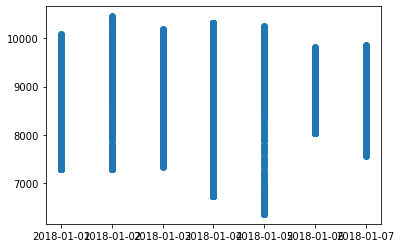

In [38]:
plt.scatter(data_3.index[0:2000], data_3['Volume'][0:2000])
plt.show

In [16]:
#data_3.to_csv("Demand 1 5 Min Meter.csv")

<H1>Weather Data Downsampling</H1>

<H2>To downsample data to day use 'D', month='M', Year='Y'</H2>

<H3>Weather Data Downsampling</H3>

In [16]:
data_weather_3 = data_weather.resample('D').mean()
data_weather_3.head()

,temperature,dewpoint,cloud_cover,humidity,wind_speed,wind_direction,precipitation
date_time,,,,,,,
2018-01-01,0.108333,-13.825000,2.291667,52.208333,15.245833,291.125000,0.000000
2018-01-02,6.779167,-5.450000,10.833333,57.500000,12.462500,259.625000,0.000000
2018-01-03,14.654167,0.554167,48.666667,55.000000,8.712500,227.625000,0.000000
2018-01-04,16.783333,9.300000,99.666667,76.625000,21.970833,188.708333,0.021667
2018-01-05,5.795833,-6.237500,47.708333,57.791667,20.854167,274.625000,0.000417


In [6]:
data_weather_3.to_csv("Demand 1 Daily Weather.csv")

<H3>Meter Data Downsampling</H3>

In [66]:
data_meter_down = data_2.resample('D').sum()
data_meter_down = data_meter_down.to_frame()
data_meter_down.head()

,Volume
date_time,
2018-01-01,203384.0
2018-01-02,214048.0
2018-01-03,207680.0
2018-01-04,206323.0
2018-01-05,203598.0


In [8]:
data_meter_down.to_csv('Demand 1 Daily Meter.csv')